# Manifold Learning Methods

## MNIST Digits

Use data form https://www.kaggle.com/c/digit-recognizer/data and suppose that files test.csv and train.csv are in same folder as notebook. You can use subsamples to spead up your calculations.

Automatically created module for IPython interactive environment
(2999, 785)


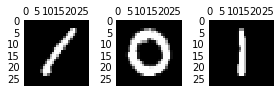

In [50]:
# (1 point) load train data, save class labels, plot first point as a digit

print(__doc__)

import csv
import numpy as np
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

Axes3D

n_points = 3000
filename = 'train.csv'
raw_data = open(filename, 'rt')
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)[1:n_points]

data = np.array(x).astype('int')
x = np.array(x)[:, 0].astype('int')
print(data.shape)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

f, axarr = plt.subplots(1, 3,figsize=(4,6))
for i in range(3):
    plt.gray()
    axarr[i%3].matshow(data[i][1:].reshape(28, 28))
f.tight_layout()
plt.show()

standard: 33 sec


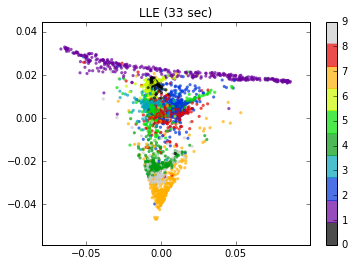

ltsa: 46 sec


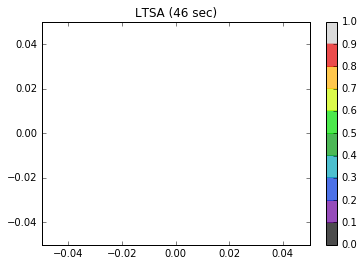

In [55]:
methods = ['standard', 'ltsa']
labels = ['LLE', 'LTSA']

for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method=method).fit_transform(data)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))
    plt.scatter(Y[:, 0], Y[:, 1], c=x, 
            edgecolor='none', alpha=0.7, s=10,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    plt.axis('tight')
    plt.colorbar()
    plt.show()


Isomap: 32 sec


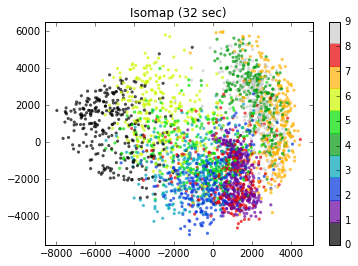

In [54]:
t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(data)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
plt.scatter(Y[:, 0], Y[:, 1], c=x, 
            edgecolor='none', alpha=0.7, s=10,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.title("Isomap (%.2g sec)" % (t1 - t0))
plt.axis('tight')
plt.colorbar()
plt.show()

MDS: 35 sec


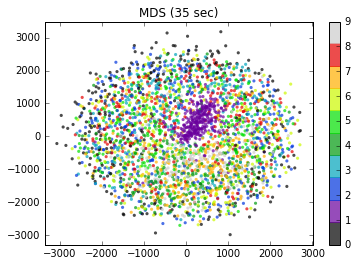

In [53]:
t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(data)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
plt.scatter(Y[:, 0], Y[:, 1], c=x, 
            edgecolor='none', alpha=0.7, s=10,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.title("MDS (%.2g sec)" % (t1 - t0))
plt.axis('tight')
plt.colorbar()
plt.show()

SpectralEmbedding: 25 sec


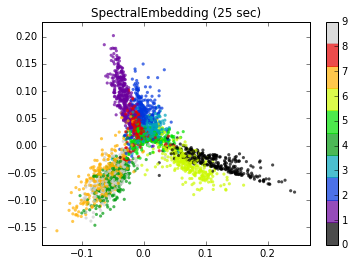

In [52]:
t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y = se.fit_transform(data)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
plt.scatter(Y[:, 0], Y[:, 1], c=x, 
            edgecolor='none', alpha=0.7, s=10,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
plt.axis('tight')
plt.colorbar()
plt.show()

t-SNE: 1.1e+02 sec


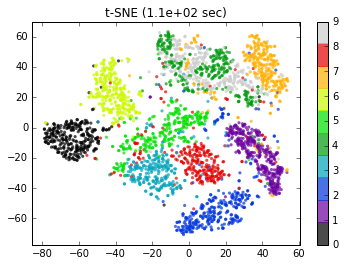

In [51]:
t0 = time()
tsne = manifold.TSNE(n_components=n_components, random_state=0)
Y = tsne.fit_transform(data)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
plt.scatter(Y[:, 0], Y[:, 1], c=x, 
            edgecolor='none', alpha=0.7, s=10,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
plt.axis('tight')
plt.colorbar()
plt.show()

### Вывод